## Udacity Project4: Wrangle, Analyze and Visualize Data

## Table of Contents
<ul>
    <li><a href="#intro">Introduction</a></li>
    <li><a href="#sources">Data Sources</a></li>
    <li><a href="#gathering">Data Gathering</a></li>
    <li><a href="#assessing">Data Assessing</a></li>
        <li><a href="#assessingsum">Data Assessment Summary</a></li>
    <li><a href="#cleaning">Data Cleaning</a></li>
    <li><a href="#cleaning">Data Storing</a></li>
    <li><a href="#analysis">Data Analysis</a></li>
    <li><a href="#conclusion">Summary and Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This project is about gathering and analyzing data from the Twitter account <a href = "https://twitter.com/dog_rates?lang=de">"WeRateDogs"</a>, a page which rates people's dogs with a humorous comment about the dog. Initial steps are to identify the different dataset sources and gather the data through manual/programmatical download and over an API, followed by assessing and cleaning few issues encountered in the data leading to the final analysis.

<a id='sources'></a>
## Data Sources


* **Dataset:** WeRateDogs account's Twitter Archive (twitter-archive-enhanced.csv)</li>
> 
>    <b>Source: </b>Udacity
>    <b>|| Gathering method:</b> Manual download
>
* **Dataset:** Tweet image predictions (image_predictions.tsv)</li>
>
>    <b>Source: </b>Udacity
>    <b>   || Gathering method:</b> Programmatical download
>
* **Dataset:** Additional Twitter data (tweet_json.txt)
> 
>    <b>Source:</b> <a href = "https://twitter.com/dog_rates">WeRateDogs</a>
>    <b>Gathering method:</b> Through Twitter API- tweepy
>


#### Import of the needed libraries:

In [762]:
import pandas as pd
pd.set_option('display.max_colwidth', -1)
import requests
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
import re
import numpy as np

<a id='gathering'></a>
## Data Gathering

#### 1. WeRateDogs account's Twitter Archive (twitter-archive-enhanced.csv)

At first I downloaded the file from Udacity. Now the file can be loaded directly into a dataframe via Pandas.

In [763]:
df_twitter_archive = pd.read_csv("twitter_archive_enhanced.csv")
df_twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


#### 2. Tweet image predictions (image_predictions.tsv)

To gather this data we are going to define the file - url, request this url and write the content of the response to a separate file.

In [764]:
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"

#get response
response = requests.get(url)

#write return to an image
with open("image_predictions.tsv", mode = "wb") as file:
    file.write(response.content)

In [765]:
df_image_pred = pd.read_csv("image_predictions.tsv", sep='\t')
df_image_pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#### 3. Additional Twitter data (tweet_json.txt)

To gather the data from the Twitter API I created a Twitter developer account and gathered the data via tweepy. This results in a new file called "tweet_json.txt".

In [766]:
#keys and token to access the API
consumer_key = 'Generate your key'
consumer_secret = 'Generate your key'
access_token = 'Generate your key'
access_secret = 'Generate your key'

#access the API
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [767]:
tweet_ids = df_twitter_archive.tweet_id.values
len(tweet_ids)

In [768]:
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

Now we can read in all the necessary data into a dictionary to create a dataframe.

In [769]:
tweet_data = []
count=0
#read the created file
with open("tweet_json.txt", "r") as f:
    for line in f:
        #print(line)
        count +=1
        try: 
            tweet = json.loads(line)
            #print(tweet['id'])
            #append a dictionary to the created list            
            tweet_data.append({
                "tweet_id": tweet["id"],
                 "retweet_count": tweet["retweet_count"],
                 "favorite_count": tweet["favorite_count"],
                 "followers" : tweet["user"]["followers_count"],
                 "display_text_range": tweet["display_text_range"]                
            })               
        except:
            print("Error. ",count)
            
df_tweet = pd.DataFrame(tweet_data, columns = ["tweet_id", "retweet_count", "favorite_count","followers", "display_text_range"])
df_tweet.head()

,tweet_id,retweet_count,favorite_count,followers,display_text_range
0,892420643555336193,7663,36000,8784269,"[0, 85]"
1,892177421306343426,5662,31062,8784269,"[0, 138]"
2,891815181378084864,3757,23375,8784269,"[0, 121]"
3,891689557279858688,7826,39281,8784269,"[0, 79]"
4,891327558926688256,8434,37501,8784269,"[0, 138]"


<a id='assessing'></a>
## Data Assessing

In this section we will assess quality and tidiness of the data and its dimensions

### 1. df_twitter_archive

In [770]:
df_twitter_archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2060,671182547775299584,NaN,NaN,2015-11-30 04:22:44 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This pup holds the secrets of the universe in his left eye. 12/10 https://t.co/F7xwE0wmnu,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671182547775299584/photo/1,12,10,None,None,None,None,None
1012,747242308580548608,NaN,NaN,2016-06-27 01:37:04 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This pupper killed this great white in an epic sea battle. Now wears it as a trophy. Such brave. Much fierce. 13/10 https://…,7.047611e+17,4.196984e+09,2016-03-01 20:11:59 +0000,"https://twitter.com/dog_rates/status/704761120771465216/photo/1,https://twitter.com/dog_rates/status/704761120771465216/photo/1",13,10,None,None,None,pupper,None
473,816336735214911488,NaN,NaN,2017-01-03 17:33:39 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Dudley. He found a flower and now he's a queen. 11/10 would be an honor to pet https://t.co/nuJxtmlLcY,NaN,NaN,NaN,https://twitter.com/dog_rates/status/816336735214911488/photo/1,11,10,Dudley,None,None,None,None
1453,695629776980148225,NaN,NaN,2016-02-05 15:27:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Calvin. He's proof that degrees mean absolutely nothing. 8/10 straighten up pup https://t.co/NIvxgSQ9BS,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/695629776980148225/photo/1,https://twitter.com/dog_rates/status/695629776980148225/photo/1",8,10,Calvin,None,None,None,None
2317,666644823164719104,NaN,NaN,2015-11-17 15:51:26 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Jimothy. He is a Botwanian Gouda. Can write (impressive). Very erect tail. Still looking for hoco date. 9/10 https://t.co/LEkZjZxESQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666644823164719104/photo/1,9,10,Jimothy,None,None,None,None


#### Visual assesment
- doggo, floofer, pupper and puppo columns contain redundant information, these can be converted into a single column
- expanded url is unnecessary as same information can be extracted from text

In [771]:
df_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [772]:
df_twitter_archive.tweet_id.nunique()

2356

In [773]:
df_twitter_archive[-df_twitter_archive.retweeted_status_id.isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Canela. She attempted some fancy porch pics. They were unsuccessful. 13/10 someone help her https://t.co/cLyzpcUcMX,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,"https://twitter.com/dog_rates/status/887473957103951883/photo/1,https://twitter.com/dog_rates/status/887473957103951883/photo/1,https://twitter.com/dog_rates/status/887473957103951883/photo/1,https://twitter.com/dog_rates/status/887473957103951883/photo/1",13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @Athletics: 12/10 #BATP https://t.co/WxwJmvjfxo,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,"https://twitter.com/dog_rates/status/886053434075471873,https://twitter.com/dog_rates/status/886053434075471873",12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Lilly. She just parallel barked. Kindly requests a reward now. 13/10 would pet so well https://t.co/SATN4If5H5,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,"https://twitter.com/dog_rates/status/830583320585068544/photo/1,https://twitter.com/dog_rates/status/830583320585068544/photo/1,https://twitter.com/dog_rates/status/830583320585068544/photo/1,https://twitter.com/dog_rates/status/830583320585068544/photo/1",13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Emmy. She was adopted today. Massive round of pupplause for Emmy and her new family. 14/10 for all involved https://…,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,"https://twitter.com/dog_rates/status/878057613040115712/photo/1,https://twitter.com/dog_rates/status/878057613040115712/photo/1",14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: Meet Shadow. In an attempt to reach maximum zooming borkdrive, he tore his ACL. Still 13/10 tho. Help him out below\n\nhttps:/…",8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitter.com/dog_rates/status/878281511006478336/photo/1",13,10,Shadow,None,None,None,None
74,878316110768087041,NaN,NaN,2017-06-23 18:17:33 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: Meet Terrance. He's being yelled at because he stapled the wrong stuff together. 11/10 hang in there Terrance https://t.co/i…,6.690004e+17,4.196984e+09,2015-11-24 03:51:38 +0000,https://twitter.com/dog_rates/status/669000397445533696/photo/1,11,10,Terrance,None,None,None,None
78,877611172832227328,NaN,NaN,2017-06-21 19:36:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @rachel2195: @dog_rates the boyfriend and his soaking wet pupper h*cking love his new hat 14/10 https://t.co/dJx4Gzc50G,8.768508e+17,5.128045e+08,2017-06-19 17:14:49 +0000,"https://twitter.com/rachel2195/status/876850772322988033/photo/1,https://twitter.com/rachel2195/status/876850772322988033/photo/1,https://twitter.com/rachel2195/status/876850772322988033/photo/1,https://twitter.com/rachel2195/status/876850772322988033/photo/1",14,10,None,None,None,pupper,None
91,874434818259525634,NaN,NaN,2017-06-13 01:14:41 +0000,"<a href=""http://twitter.com/download/iphone"" re

#### Data Assessment
- tweet_id should be string
- timestamp - columns should be datetime objects
- Contains retweets


In [774]:
# different names 
df_twitter_archive.name.value_counts()

None         745
a            55 
Charlie      12 
Oliver       11 
Lucy         11 
Cooper       11 
Lola         10 
Penny        10 
Tucker       10 
Winston      9  
Bo           9  
the          8  
Sadie        8  
an           7  
Toby         7  
Daisy        7  
Bailey       7  
Buddy        7  
Rusty        6  
Milo         6  
Stanley      6  
Oscar        6  
Scout        6  
Dave         6  
Leo          6  
Jax          6  
Bella        6  
Koda         6  
Jack         6  
Bentley      5  
            ..  
Bodie        1  
Tiger        1  
Mac          1  
Banjo        1  
Holly        1  
Jeffrie      1  
Timber       1  
Suki         1  
Koko         1  
Swagger      1  
Venti        1  
Maisey       1  
Bookstore    1  
Grizzie      1  
Jackie       1  
Rolf         1  
Einstein     1  
Mojo         1  
Beebop       1  
Jeb          1  
Bloo         1  
Bert         1  
Diogi        1  
life         1  
Samsom       1  
Tebow        1  
Karma        1  
Arnold       1

- the name column contains wrong names like "None","a", "the", "an"

In [775]:
df_twitter_archive[df_twitter_archive.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


There are few rows where no classification is done on dogs as doggo, pupper, puppo, floof all are empty

In [776]:
#returns true if there is no dog classification in any of the columns
df_twitter_archive[["doggo","floofer","pupper","puppo"]].apply(lambda x: True if
    (x[0] == "None" and x[1] == "None" and x[2] == "None" and x[3] =="None") 
    else False, axis = 1).value_counts()

True     1976
False    380 
dtype: int64

##### Assessment on quantitative columns
Ratings have a format of 13/10 or 12/10.. because "they're good dogs Brent". So, a numerator_rating > 10 and a denominator_rating = 10 is expected

In [777]:
# Sort by rating_numerator values
df_twitter_archive.rating_numerator.value_counts().sort_index()

0       2  
1       9  
2       9  
3       19 
4       17 
5       37 
6       32 
7       55 
8       102
9       158
10      461
11      464
12      558
13      351
14      54 
15      2  
17      1  
20      1  
24      1  
26      1  
27      1  
44      1  
45      1  
50      1  
60      1  
75      2  
80      1  
84      1  
88      1  
99      1  
121     1  
143     1  
144     1  
165     1  
182     1  
204     1  
420     2  
666     1  
960     1  
1776    1  
Name: rating_numerator, dtype: int64

Numerator ratings vary from 0 - 1776, Let's examine the extreme cases by reading the text description present

In [778]:
print(df_twitter_archive.query("rating_numerator == '0'").text)

315     When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag      
1016    PUPDATE: can't see any. Even if I could, I couldn't reach them to pet. 0/10 much disappointment https://t.co/c7WXaB2nqX
Name: text, dtype: object


In [779]:
print(df_twitter_archive.query("rating_numerator == '1'").text)

605     RT @dog_rates: Not familiar with this breed. No tail (weird). Only 2 legs. Doesn't bark. Surprisingly quick. Shits eggs. 1/10 https://t.co/…
1446    After reading the comments I may have overestimated this pup. Downgraded to a 1/10. Please forgive me                                       
1869    What kind of person sends in a picture without a dog in it? 1/10 just because that's a nice table https://t.co/RDXCfk8hK0                   
1940    The millennials have spoken and we've decided to immediately demote to a 1/10. Thank you                                                    
2038    After 22 minutes of careful deliberation this dog is being demoted to a 1/10. The longer you look at him the more terrifying he becomes     
2091    Flamboyant pup here. Probably poisonous. Won't eat kibble. Doesn't bark. Slow af. Petting doesn't look fun. 1/10 https://t.co/jxukeh2BeO    
2261    Never seen dog like this. Breathes heavy. Tilts head in a pattern. No bark. Shitty at fetch. Not e

* Low ratings are because of either no dog picture is there or the picture is plagiarized as it already had been rated by the account
* For 2335 3 1/2 legged was interpreted as rating 1/2, rather it should be 9/10

In [780]:
print(df_twitter_archive.query("rating_numerator == '1776'").text)

979    This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh
Name: text, dtype: object


This picture received very high rating because it was posted on 4th July [America's Independence Day]. So there is no mistake as well

In [781]:
# Sort by rating_denominator values
df_twitter_archive.rating_denominator.value_counts().sort_index()

0      1   
2      1   
7      1   
10     2333
11     3   
15     1   
16     1   
20     2   
40     1   
50     3   
70     1   
80     2   
90     1   
110    1   
120    1   
130    1   
150    1   
170    1   
Name: rating_denominator, dtype: int64

Most of the values are 10, Let's examine the extreme values

In [782]:
print(df_twitter_archive.query("rating_denominator == '170'").text)

1120    Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv
Name: text, dtype: object


* The photo contains 17 dogs, hence the 17*10= 170. This rating(1120) can be generalized as per one dog

In [783]:
print(df_twitter_archive.query("rating_denominator == '0'").text)

313    @jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho
Name: text, dtype: object


So the issue here is there are two ratings given in a single tweet (960/00 and 13/10). As this page has a reputation of rating dogs with added humor, there might be more than one instances where this scenario occurs. 


- Multiple ratings in a single tweet

### 2. df_image_pred

In [784]:
df_image_pred.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1602,800018252395122689,https://pbs.twimg.com/ext_tw_video_thumb/800018199223959552/pu/img/3Qp73edtkZO-qWPy.jpg,1,vacuum,0.289485,False,punching_bag,0.243297,False,barbell,0.143630,False
385,673345638550134785,https://pbs.twimg.com/media/CVg0SVRWEAAsBrS.jpg,1,hamster,0.761025,False,weasel,0.069362,False,Pomeranian,0.064627,True
1797,831552930092285952,https://pbs.twimg.com/media/C4pE-I0WQAABveu.jpg,1,Chihuahua,0.257415,True,Pembroke,0.161442,True,French_bulldog,0.092143,True
514,676237365392908289,https://pbs.twimg.com/media/CWJ6Sc-WwAAlpI6.jpg,1,French_bulldog,0.961996,True,Chihuahua,0.021793,True,Boston_bull,0.006916,True
579,678764513869611008,https://pbs.twimg.com/media/CWt0ubZWcAAkFER.jpg,1,Irish_terrier,0.696646,True,Australian_terrier,0.074962,True,Irish_setter,0.063901,True


#### Visual Assessment
- Redundant data in `p.._dog` column, should be melted
- Values in p1, p2, p3 columns are not generalized, there is random use of -, _, lowercase and uppercase

In [785]:
df_image_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [786]:
df_image_pred.tweet_id.nunique()

2075

In [787]:
# checking for retweets
df_image_pred.jpg_url.value_counts().head(10)

https://pbs.twimg.com/media/CW88XN4WsAAlo8r.jpg                                            2
https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg                                            2
https://pbs.twimg.com/media/CvJCabcWgAIoUxW.jpg                                            2
https://pbs.twimg.com/media/CtVAvX-WIAAcGTf.jpg                                            2
https://pbs.twimg.com/media/CYLDikFWEAAIy1y.jpg                                            2
https://pbs.twimg.com/ext_tw_video_thumb/815965888126062592/pu/img/JleSw4wRhgKDWQj5.jpg    2
https://pbs.twimg.com/media/CVuQ2LeUsAAIe3s.jpg                                            2
https://pbs.twimg.com/ext_tw_video_thumb/817423809049493505/pu/img/5OFW0yueFu9oTUiQ.jpg    2
https://pbs.twimg.com/media/Cveg1-NXgAASaaT.jpg                                            2
https://pbs.twimg.com/media/Cbs3DOAXIAAp3Bd.jpg                                            2
Name: jpg_url, dtype: int64

### Data Assessment
- tweet_id datatype should be string(object)
- Only 2075 unique tweet_ids, less than df_twiiter_archive(2365)

In [788]:
df_image_pred[df_image_pred.tweet_id.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


### 3. df_tweet

In [789]:
df_tweet.sample(5)

,tweet_id,retweet_count,favorite_count,followers,display_text_range
503,810254108431155201,3429,14900,8784282,"[0, 118]"
1092,732585889486888962,769,3618,8784282,"[0, 96]"
2306,666353288456101888,65,197,8784319,"[0, 135]"
977,747933425676525569,2521,6562,8784281,"[0, 115]"
96,873213775632977920,1456,6707,8784269,"[0, 140]"


In [790]:
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 5 columns):
tweet_id              2331 non-null int64
retweet_count         2331 non-null int64
favorite_count        2331 non-null int64
followers             2331 non-null int64
display_text_range    2331 non-null object
dtypes: int64(4), object(1)
memory usage: 91.1+ KB


- No missing data here
- tweet_id datatype should be string

<a id='assessingsum'></a>
### Data Assessment Summary

### Quality

##### `df_twitter_archive` dataset
- expanded url is unnecessary as same information can be extracted from text
- tweet_id should be string
- All timestamp columns should be datetime objects
- the name column contains wrong names like "None","a", "the", "an"
- The photo contains 17 dogs, hence the 17*10= 170. This rating(1120) can be generalized as per one dog	
- Multiple ratings in a single tweet
- Contains retweets

##### `df_image_pred` table
- Values in p1, p2, p3 columns are not generalized, there is random use of -, _, lowercase and uppercase
- For some of the rows there is no entry in either p1_dog or p2_dog or p3_dog, i.e. no prediction for a dog
- tweet_id datatype should be string(object)
- Only 2075 unique tweet_ids, less than df_twiiter_archive(2365)
- Contains replies and retweets

##### `df_tweet` table
- tweet_id datatype should be string(object)

### Tidiness
##### `df_twitter` table
- `doggo`, `floofer`, `pupper` and `puppo` columns contain redundant information, these can be converted into a single column

##### `df_predict` table
- the prediction column should be melted into one column

##### `all` tables
- `tweet_id`column from all three datasets should be merged

<a id='cleaning'></a>
## Data Cleaning

### Cleaning steps:
#### Define

<ol>
    <li>Merge the tables</li>
    <li>Remove the replies and retweets, drop unnecessary columns [colums with which we are not concerned right now] </li>
    <li>Change the datatypes of the columns</li>
    <li>Clean the numerators/denominator rating - the ones with multiple occurence of the pattern or misinterpreted</li>
    <li>Drop the expanded url column</li>
    <li>Some denominator ratings are greater than 10. These denom/numerator ratings can be generalized as per one dog </li>
    <li>Remove the "None" out of the doggo, floofer, pupper and puppo column and merge them into one column</li>
    <li>Remove the wrong names of name column</li>
    <li>Reduce the prediction columns</li>
    <li>Clean the newly created column by generalizing the pattern</li>
</ol>

#### 1. Merge the tables together
#### Code

All the datasets have a common key, i.e. `tweet_id` and can be merged on it. Starting with a full join to avoid missing on any data.

In [791]:
df_master = pd.merge(df_twitter_archive, df_tweet, on = "tweet_id", how = "outer")

In [792]:
df_master = pd.merge(df_master, df_image_pred, on = "tweet_id", how = "outer")

In [793]:
# to keep the original merged dataset intact, we will perform cleaning on copied dataset
df_master_clean = df_master.copy()

In [794]:
df_master_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,...,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,...,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,...,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,...,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",...,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


#### Test

In [795]:
df_master_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 32 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
retweet_count                 23

#### 2. Remove the replies and retweets

#### Code

In [796]:
# will return rows without retweets
df_master_clean = df_master_clean[df_master_clean.retweeted_status_id.isnull()]

In [797]:
#will return rows without replies
df_master_clean = df_master_clean[df_master_clean.in_reply_to_status_id.isnull()]

In [798]:
df_master_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'retweet_count', 'favorite_count', 'followers', 'display_text_range',
       'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [799]:
#test
len(df_master_clean[df_master_clean.retweeted_status_id.isnull() == False])

0

In [800]:
#drop the unnecessray columns
df_master_clean.drop(["in_reply_to_status_id", "in_reply_to_user_id","retweeted_status_id", "retweeted_status_user_id", 
                      "retweeted_status_timestamp"], inplace=True, axis = 1)

#### Test

In [801]:
df_master_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo', 'retweet_count', 'favorite_count', 'followers',
       'display_text_range', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog',
       'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [802]:
df_master_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 27 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null object
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
retweet_count         2090 non-null float64
favorite_count        2090 non-null float64
followers             2090 non-null float64
display_text_range    2090 non-null object
jpg_url               1971 non-null object
img_num               1971 non-null float64
p1                    1971 non-null object
p1_conf               1971 non-null float64
p1_dog                1971 non-

* 2097 rows left

#### 3. Change the datatypes of the columns

#### Code

In [803]:
df_master_clean["tweet_id"] = df_master_clean["tweet_id"].astype("str")

In [804]:
#transform the timestamp to datetime
df_master_clean["timestamp"] = pd.to_datetime(df_master_clean.timestamp)

#### Test

In [805]:
df_master_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 27 columns):
tweet_id              2097 non-null object
timestamp             2097 non-null datetime64[ns, UTC]
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
retweet_count         2090 non-null float64
favorite_count        2090 non-null float64
followers             2090 non-null float64
display_text_range    2090 non-null object
jpg_url               1971 non-null object
img_num               1971 non-null float64
p1                    1971 non-null object
p1_conf               1971 non-null float64
p1_dog           

#### 4. Clean the numerators/denominator rating - the ones with multiple occurence of the pattern

#### Code

In [806]:
# trying to identify multiple ratings in a tweet
pattern = "(\d+(\.\d+)?\/\d+(\.\d+)?)" 

We also have the problem, that there can be multiple occurrences of the pattern. The reason for this is - most of the time - the display of two or more dogs in an image. For this cases we could add the ratings up, because the author of the Twitter account did this in one case that we found. Or we could build the average rating per each picture. For now, we are going to drop them out of the dataframe.

In [807]:
# Multiple occurence of the pattern

#get the index of the rows which contains the pattern more than once
pattern_clean_index = df_master_clean.text.str.count(pattern)[df_master_clean.text.str.count(pattern) != 1].index
pattern_clean_index

Int64Index([ 766, 1007, 1068, 1165, 1202, 1222, 1359, 1459, 1465, 1508, 1525,
            1538, 1662, 1795, 1832, 1897, 1901, 1970, 2010, 2064, 2113, 2177,
            2216, 2263, 2272, 2306, 2335],
           dtype='int64')

In [808]:
df_master_clean.drop(pattern_clean_index, inplace = True)

In [809]:
df_master_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2070 entries, 0 to 2355
Data columns (total 27 columns):
tweet_id              2070 non-null object
timestamp             2070 non-null datetime64[ns, UTC]
source                2070 non-null object
text                  2070 non-null object
expanded_urls         2067 non-null object
rating_numerator      2070 non-null int64
rating_denominator    2070 non-null int64
name                  2070 non-null object
doggo                 2070 non-null object
floofer               2070 non-null object
pupper                2070 non-null object
puppo                 2070 non-null object
retweet_count         2063 non-null float64
favorite_count        2063 non-null float64
followers             2063 non-null float64
display_text_range    2063 non-null object
jpg_url               1944 non-null object
img_num               1944 non-null float64
p1                    1944 non-null object
p1_conf               1944 non-null float64
p1_dog           

In [810]:
#https://stackoverflow.com/questions/36028932/how-to-extract-specific-content-in-a-pandas-dataframe-with-a-regex

df_master_clean["rating"] = df_master_clean.text.str.extract(pattern, expand = True)[0]

#https://stackoverflow.com/questions/14745022/how-to-split-a-column-into-two-columns

df_master_clean[['num', 'denom']] = df_master_clean['rating'].str.split('/', n=1, expand=True)

In [811]:
df_master_clean.rating_numerator = df_master_clean.rating_numerator.astype("str")
df_master_clean.rating_denominator = df_master_clean.rating_denominator.astype("str")


In [812]:
#look for differences in the original numerator and the newe extract
df_master_clean["check_num"] = df_master_clean[["rating_numerator", "num"]].apply(lambda x: False if (x[0] != x[1]) else True, axis = 1)
df_master_clean.check_num.value_counts()

True     2066
False    4   
Name: check_num, dtype: int64

In [813]:
df_num_clean = df_master_clean.query("check_num == False")[["rating_numerator", "num", "check_num"]]
df_num_clean

,rating_numerator,num,check_num
45,5,13.5,False
695,75,9.75,False
763,27,11.27,False
1712,26,11.26,False


In [814]:
df_num_clean['num'].values

array(['13.5', '9.75', '11.27', '11.26'], dtype=object)

In [815]:
#get the index of the wrong data
df_num_clean_index = df_num_clean['num'].index
df_num_clean_values = df_num_clean['num'].values.astype("float64")

In [816]:
df_num_clean_index

Int64Index([45, 695, 763, 1712], dtype='int64')

In [817]:
#transform the datatypes to float
df_master_clean.rating_numerator = df_master_clean.rating_numerator.astype("float64")
df_master_clean.rating_denominator = df_master_clean.rating_denominator.astype("float64")
#impute the data
df_master_clean.loc[df_num_clean_index, "rating_numerator"] = df_num_clean_values

In [818]:
df_master_clean["check_denom"] = df_master_clean[["rating_denominator", "denom"]].apply(lambda x: False if (x[0]!=x[1]) else True, axis = 1)
df_master_clean.query("check_denom == False")[["rating_denominator", "denom","check_denom"]]
df_master_clean.check_denom.value_counts()

False    2070
Name: check_denom, dtype: int64

#### Test

In [819]:
#no more occurrences of the mentioned problem are left
print(df_master_clean.text.str.count(pattern)[df_master_clean.text.str.count(pattern) != 1])

Series([], Name: text, dtype: int64)


In [820]:
df_master_clean.loc[df_num_clean_index].rating_numerator

45      13.50
695     9.75 
763     11.27
1712    11.26
Name: rating_numerator, dtype: float64

#### 5. Drop extracted url column

#### Code

In [821]:
df_master_clean.drop(columns = ['expanded_urls'], axis = 1, inplace = True)

#### Test

In [822]:
df_master_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2070 entries, 0 to 2355
Data columns (total 31 columns):
tweet_id              2070 non-null object
timestamp             2070 non-null datetime64[ns, UTC]
source                2070 non-null object
text                  2070 non-null object
rating_numerator      2070 non-null float64
rating_denominator    2070 non-null float64
name                  2070 non-null object
doggo                 2070 non-null object
floofer               2070 non-null object
pupper                2070 non-null object
puppo                 2070 non-null object
retweet_count         2063 non-null float64
favorite_count        2063 non-null float64
followers             2063 non-null float64
display_text_range    2063 non-null object
jpg_url               1944 non-null object
img_num               1944 non-null float64
p1                    1944 non-null object
p1_conf               1944 non-null float64
p1_dog                1944 non-null object
p2           

#### 6. Some denominator ratings are greater than 10. These denom/numerator ratings can be generalized as per one dog

#### Code

In [823]:
def tokens(x):
  return [m.group(1) for m in re.finditer(pattern, x)]

In [824]:
# iterate through all those records whose rating_denominator is not 10
count=0 
for i, row in df_master_clean[df_master_clean.rating_denominator != 10].iterrows():
    d = row.rating_denominator
    #print("11::",d)
    # if rating_denominator is greater than 10 and divisible by 10
    if d > 10 and d%10 == 0:
        # assign divisor as the quotient
        divisor = d/10
        #print("divisor", divisor)
        n = row.rating_numerator
        #print("22::",n)
        #print("33:::", i)
        # if rating_numerator is greater than 10 and divisible by the divisor
        if n%divisor == 0:
            # reassign rating_denominator as 10
            df_master_clean.set_value(i, 'rating_denominator', 10)
            # reassign rating_numerator as the quotient of rating_numerator by divisor
            df_master_clean.set_value(i, 'rating_numerator', int(n/divisor))
            count += 1
    
    # for all those records whose rating_denominator is either less than 10 or not divisible by 10
    else:
        # extract all fractions(ratings) from text using tokens function
        ratings = tokens(row.text)
        #print("in else")
        # iterate through all the fractions
        for rating in ratings:
            print(rating)
            # if denominator of any such fraction is equal to 10
            if rating.split('/')[1] == '10':
                # reassign rating_denominator as 10
                df_master_clean.set_value(i, 'rating_denominator', 10)
                print("i value ::",i)
                # reassign rating_numerator as the numerator value of this fraction
                df_master_clean.set_value(i, 'rating_numerator', int(round(float(rating.split('/')[0]))))
                break

11:: 70.0
divisor 7.0
22:: 84.0
33::: 433
11:: 7.0
in else
24/7
11:: 150.0
divisor 15.0
22:: 165.0
33::: 902
11:: 170.0
divisor 17.0
22:: 204.0
33::: 1120
11:: 90.0
divisor 9.0
22:: 99.0
33::: 1228
11:: 80.0
divisor 8.0
22:: 80.0
33::: 1254
11:: 50.0
divisor 5.0
22:: 45.0
33::: 1274
11:: 50.0
divisor 5.0
22:: 60.0
33::: 1351
11:: 40.0
divisor 4.0
22:: 44.0
33::: 1433
11:: 110.0
divisor 11.0
22:: 121.0
33::: 1635
11:: 120.0
divisor 12.0
22:: 144.0
33::: 1779
11:: 80.0
divisor 8.0
22:: 88.0
33::: 1843


C:\Users\dushy\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\dushy\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


#### Test

In [825]:
df_master_clean[df_master_clean.rating_denominator>1000]

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,...,p2_conf,p2_dog,p3,p3_conf,p3_dog,rating,num,denom,check_num,check_denom


#### 7. Remove the "None" out of the doggo, floofer, pupper and puppo column and merge them into one column

#### Code

### 8. Remove the wrong names of name column

#### Code

In [826]:
# merge the doggo, floofer, pupper and puppo columns to a stage column
df_master_clean['stage'] = df_master_clean[['doggo', 'floofer', 'pupper', 'puppo']].max(axis=1)

In [827]:
# convert the datatype from string to categorical
df_master_clean.stage = df_master_clean.stage.astype('category')

In [828]:
# drop the doggo, floofer, pupper and puppo columns
df_master_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

Here we will also replace the wrong names with np.nan.

In [829]:
for x in ["None", "a", "by", "the", "an","this","one","mad","light","just"]:
    df_master_clean["name"].replace(x, np.nan, inplace = True)

#### Test

In [830]:
df_master_clean.name.value_counts()

Charlie     11
Lucy        11
Cooper      10
Oliver      10
Penny       9 
Tucker      9 
Lola        8 
Sadie       8 
Winston     8 
Daisy       7 
Toby        7 
Bailey      6 
Stanley     6 
Koda        6 
Bella       6 
Oscar       6 
Bo          6 
Jax         6 
Chester     5 
Dave        5 
Louis       5 
Milo        5 
Leo         5 
Rusty       5 
Bentley     5 
Scout       5 
Buddy       5 
Derek       4 
Brody       4 
very        4 
           .. 
Stella      1 
Tater       1 
Mack        1 
Miley       1 
Glacier     1 
Karma       1 
Crumpet     1 
Tebow       1 
Molly       1 
Lassie      1 
Trigger     1 
Swagger     1 
Venti       1 
Maisey      1 
Sierra      1 
Kenny       1 
Grizzie     1 
Jackie      1 
Rolf        1 
Einstein    1 
Mojo        1 
Koko        1 
Beebop      1 
Bloo        1 
Bert        1 
Diogi       1 
Jamesy      1 
life        1 
Samsom      1 
Ambrose     1 
Name: name, Length: 932, dtype: int64

In [831]:
df_master_clean.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,retweet_count,favorite_count,followers,...,p2_dog,p3,p3_conf,p3_dog,rating,num,denom,check_num,check_denom,stage
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13.0,10.0,Phineas,7663.0,36000.0,8784269.0,...,False,banana,0.076110,False,13/10,13,10,True,False,None
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13.0,10.0,Tilly,5662.0,31062.0,8784269.0,...,True,papillon,0.068957,True,13/10,13,10,True,False,None
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,12.0,10.0,Archie,3757.0,23375.0,8784269.0,...,True,kelpie,0.031379,True,12/10,12,10,True,False,None
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,13.0,10.0,Darla,7826.0,39281.0,8784269.0,...,True,spatula,0.040836,False,13/10,13,10,True,False,None
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",12.0,10.0,Franklin,8434.0,37501.0,8784269.0,...,True,German_short-haired_pointer,0.175219,True,12/10,12,10,True,False,None


In [832]:
df_master_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2070 entries, 0 to 2355
Data columns (total 28 columns):
tweet_id              2070 non-null object
timestamp             2070 non-null datetime64[ns, UTC]
source                2070 non-null object
text                  2070 non-null object
rating_numerator      2070 non-null float64
rating_denominator    2070 non-null float64
name                  1399 non-null object
retweet_count         2063 non-null float64
favorite_count        2063 non-null float64
followers             2063 non-null float64
display_text_range    2063 non-null object
jpg_url               1944 non-null object
img_num               1944 non-null float64
p1                    1944 non-null object
p1_conf               1944 non-null float64
p1_dog                1944 non-null object
p2                    1944 non-null object
p2_conf               1944 non-null float64
p2_dog                1944 non-null object
p3                    1944 non-null object
p3_conf     

### 9. Reduce the prediction columns

#### Code

In the next step we want to reduce the prediction columns into two - breed and confidence. The columns are already sorted by confidence. We will take the most likely prediction for each row which is supposed to be a dog.

In [833]:
#extract the most likely prediction which is a dog
def get_attr(x):
    if x[0] == True:
        return x[1]
    elif x[2] == True:
        return x[3]
    else:
        return x[4]
    
df_master_clean["breed"] = df_master_clean[["p1_dog", "p1", "p2_dog", "p2", "p3"]].apply(get_attr, axis = 1)
df_master_clean["conf"] = df_master_clean[["p1_dog", "p1_conf", "p2_dog", "p2_conf", "p3_conf"]].apply(get_attr, axis = 1)

In [834]:
df_master_clean.iloc[:, 12:]

,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,rating,num,denom,check_num,check_denom,stage,breed,conf
0,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,13/10,13,10,True,False,None,banana,0.076110
1,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,13/10,13,10,True,False,None,Chihuahua,0.323581
2,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,12/10,12,10,True,False,None,Chihuahua,0.716012
3,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,13/10,13,10,True,False,None,Labrador_retriever,0.168086
4,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,12/10,12,10,True,False,None,basset,0.555712
5,1.0,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False,13/10,13,10,True,False,None,Chesapeake_Bay_retriever,0.425595
6,1.0,Appenzeller,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False,13/10,13,10,True,False,None,Appenzeller,0.341703
7,2.0,Pomeranian,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True,13/10,13,10,True,False,None,Pomeranian,0.566142
8,1.0,Irish_terrier,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True,13/10,13,10,True,False,None,Irish_terrier,0.487574
9,1.0,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True,14/10,14,10,True,False,doggo,Pembroke,0.511319


In [835]:
#drop the reduced columns
df_master_clean.drop(df_master_clean.columns[12:21], inplace = True, axis = 1)

#### Test

In [836]:
df_master_clean.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,retweet_count,favorite_count,followers,...,jpg_url,p3_dog,rating,num,denom,check_num,check_denom,stage,breed,conf
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13.0,10.0,Phineas,7663.0,36000.0,8784269.0,...,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,False,13/10,13,10,True,False,None,banana,0.076110
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13.0,10.0,Tilly,5662.0,31062.0,8784269.0,...,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,True,13/10,13,10,True,False,None,Chihuahua,0.323581
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,12.0,10.0,Archie,3757.0,23375.0,8784269.0,...,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,True,12/10,12,10,True,False,None,Chihuahua,0.716012
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,13.0,10.0,Darla,7826.0,39281.0,8784269.0,...,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,False,13/10,13,10,True,False,None,Labrador_retriever,0.168086
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",12.0,10.0,Franklin,8434.0,37501.0,8784269.0,...,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,True,12/10,12,10,True,False,None,basset,0.555712


### 10. Clean the newly created column by generalizing the pattern

#### Code

Now that we have our reduced column, we have to clean it for consistency.

In [837]:
#replace "_" with " "
df_master_clean.breed = df_master_clean.breed.str.replace("_", " ")

In [838]:
df_master_clean.breed

0       banana                     
1       Chihuahua                  
2       Chihuahua                  
3       Labrador retriever         
4       basset                     
5       Chesapeake Bay retriever   
6       Appenzeller                
7       Pomeranian                 
8       Irish terrier              
9       Pembroke                   
10      Samoyed                    
11      French bulldog             
12      Pembroke                   
13      French bulldog             
14      golden retriever           
15      whippet                    
16      golden retriever           
17      golden retriever           
18      Siberian husky             
20      French bulldog             
21      basset                     
22      shopping cart              
23      Pembroke                   
24      Mexican hairless           
25      Samoyed                    
26      Chihuahua                  
27      kuvasz                     
28      car wheel           

In [839]:
#lower the strings
df_master_clean.breed = df_master_clean.breed.str.lower()

In [840]:
df_master_clean.breed.value_counts().head(5)

golden retriever      154
labrador retriever    105
pembroke              93 
chihuahua             87 
pug                   62 
Name: breed, dtype: int64

In [841]:
#reset index to match with the real amount of rows
df_master_clean.reset_index(drop = True, inplace = True)

#### Test

In [842]:
df_master_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2070 entries, 0 to 2069
Data columns (total 21 columns):
tweet_id              2070 non-null object
timestamp             2070 non-null datetime64[ns, UTC]
source                2070 non-null object
text                  2070 non-null object
rating_numerator      2070 non-null float64
rating_denominator    2070 non-null float64
name                  1399 non-null object
retweet_count         2063 non-null float64
favorite_count        2063 non-null float64
followers             2063 non-null float64
display_text_range    2063 non-null object
jpg_url               1944 non-null object
p3_dog                1944 non-null object
rating                2070 non-null object
num                   2070 non-null object
denom                 2070 non-null object
check_num             2070 non-null bool
check_denom           2070 non-null bool
stage                 2070 non-null category
breed                 1944 non-null object
conf             

In [843]:
df_master_clean[["breed", "conf"]].sample(3)

,breed,conf
269,pomeranian,0.153862
1445,assault rifle,0.097000
655,beagle,0.993333


In [844]:
df_master_clean.drop(columns=['check_num','check_denom'], axis = 1, inplace = True)

<a id='analysis'></a>
## Storing Data

In [845]:
#save the data to a *.csv file
df_master_clean.to_csv('twitter_archive_master.csv', index = False)

<a id='analysis'></a>
## Data Analysis

In [846]:
import matplotlib.pyplot as plt
import seaborn as sns

In [847]:
#read in the master csv
df = pd.read_csv("twitter_archive_master.csv")

In [848]:
df.sample(5)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,retweet_count,favorite_count,followers,display_text_range,jpg_url,p3_dog,rating,num,denom,stage,breed,conf
612,773191612633579521,2016-09-06 16:10:20+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Grey. He's the dogtor in charge of your checkpup today. 12/10 I'd never miss an appointment https://t.co/9HEVPJEioD,12.0,10.0,Grey,4164.0,10056.0,8784282.0,"[0, 99]",https://pbs.twimg.com/media/CrrtqjdXEAINleR.jpg,True,12/10,12.0,10,None,blenheim spaniel,0.427766
972,717537687239008257,2016-04-06 02:21:30+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",People please. This is a Deadly Mediterranean Plop T-Rex. We only rate dogs. Only send in dogs. Thanks you... 11/10 https://t.co/2ATDsgHD4n,11.0,10.0,NaN,1828.0,5712.0,8784293.0,"[0, 139]",https://pbs.twimg.com/media/CfU0t75W4AAUo9V.jpg,True,11/10,11.0,10,None,golden retriever,0.779356
553,782969140009107456,2016-10-03 15:42:44+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Cali. She arrived preassembled. Convenient af. 12/10 appears to be rather h*ckin pettable https://t.co/vOBV1ZqVcX,12.0,10.0,Cali,7471.0,24387.0,8784282.0,"[0, 97]",https://pbs.twimg.com/media/Ct2qO5PXEAE6eB0.jpg,True,12/10,12.0,10,None,golden retriever,0.171393
374,815390420867969024,2017-01-01 02:53:20+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy New Year from the squad! 13/10 for all https://t.co/9njRxyUd5L,13.0,10.0,NaN,3850.0,10470.0,8784282.0,"[0, 44]",https://pbs.twimg.com/media/C1DZQiTXgAUqgRI.jpg,False,13/10,13.0,10,None,paper towel,0.046147
1600,675501075957489664,2015-12-12 02:23:01+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","I shall call him squishy and he shall be mine, and he shall be my squishy. 13/10 https://t.co/WId5lxNdPH",13.0,10.0,NaN,5644.0,16657.0,8784298.0,"[0, 104]",https://pbs.twimg.com/media/CV_cnjHWUAADc-c.jpg,False,13/10,13.0,10,None,french loaf,0.018189


In [849]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2070 entries, 0 to 2069
Data columns (total 19 columns):
tweet_id              2070 non-null int64
timestamp             2070 non-null object
source                2070 non-null object
text                  2070 non-null object
rating_numerator      2070 non-null float64
rating_denominator    2070 non-null float64
name                  1399 non-null object
retweet_count         2063 non-null float64
favorite_count        2063 non-null float64
followers             2063 non-null float64
display_text_range    2063 non-null object
jpg_url               1944 non-null object
p3_dog                1944 non-null object
rating                2070 non-null object
num                   2070 non-null float64
denom                 2070 non-null int64
stage                 2070 non-null object
breed                 1944 non-null object
conf                  1944 non-null float64
dtypes: float64(7), int64(2), object(10)
memory usage: 307.3+ KB


### 1. Finding Most Popular Dog Names


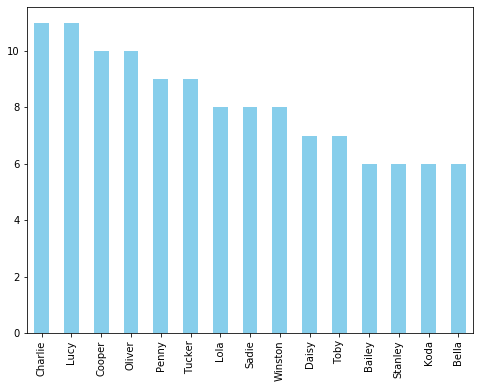

In [850]:
fig, ax = plt.subplots(figsize=(8,6))

names = df[df['name'] != "None"]
names['name'].value_counts().head(15).plot(kind = 'bar', color = 'skyblue')
plt.show();

* The most often tweeted dognames are Charlie, Lucy, Oliver and Cooper. Other names such as Lola, Daisy and Bella are also popular.

### 2. Most predicted dog breed

In [851]:
df['breed'].value_counts()

golden retriever                  154
labrador retriever                105
pembroke                          93 
chihuahua                         87 
pug                               62 
toy poodle                        50 
chow                              48 
samoyed                           42 
pomeranian                        39 
malamute                          33 
french bulldog                    31 
cocker spaniel                    29 
chesapeake bay retriever          29 
miniature pinscher                24 
eskimo dog                        22 
cardigan                          21 
german shepherd                   21 
staffordshire bullterrier         20 
beagle                            20 
shih-tzu                          20 
siberian husky                    19 
shetland sheepdog                 18 
rottweiler                        18 
maltese dog                       18 
italian greyhound                 17 
basset                            17 
kuvasz      

* Golden Retriever is the most predicted breed by the image prediction algorithm followed by labrador retriever.

### 3. Breed with most retweets and likes

In [852]:
df_breed_group = df[["retweet_count", "favorite_count","breed"]].groupby("breed", as_index = False).sum()

In [853]:
df_breed_group.sort_values("retweet_count", ascending = False).head()

,breed,retweet_count,favorite_count
130,golden retriever,501697.0,1752336.0
170,labrador retriever,344889.0,1115084.0
226,pembroke,256528.0,962333.0
77,chihuahua,211273.0,674326.0
257,samoyed,169222.0,513583.0


In [854]:
df_breed_group.sort_values("favorite_count", ascending = False).head()

,breed,retweet_count,favorite_count
130,golden retriever,501697.0,1752336.0
170,labrador retriever,344889.0,1115084.0
226,pembroke,256528.0,962333.0
77,chihuahua,211273.0,674326.0
121,french bulldog,143522.0,560023.0


* Golden retriever and Labrador Retreiver are top in the list of most favorite and most retweets.

### 4. Most retweetet and favorited tweet

In [855]:
df[["retweet_count", "favorite_count", "breed","tweet_id"]].sort_values("retweet_count", ascending = False).head()

,retweet_count,favorite_count,breed,tweet_id
823,77286.0,155310.0,labrador retriever,744234799360020481
861,57379.0,114793.0,eskimo dog,739238157791694849
419,56335.0,119957.0,chihuahua,807106840509214720
325,43552.0,132351.0,lakeland terrier,822872901745569793
60,40341.0,98754.0,english springer,879415818425184262


* The tweet (tweet_id = 744234799360020481) containing `Labrador Retriever` received the highest retweets.

In [856]:
df[["retweet_count", "favorite_count", "breed", "tweet_id"]].sort_values("favorite_count", ascending = False).head()

,retweet_count,favorite_count,breed,tweet_id
823,77286.0,155310.0,labrador retriever,744234799360020481
325,43552.0,132351.0,lakeland terrier,822872901745569793
419,56335.0,119957.0,chihuahua,807106840509214720
115,32750.0,115862.0,french bulldog,866450705531457537
861,57379.0,114793.0,eskimo dog,739238157791694849


* The same tweet (`tweet_id = 744234799360020481`) also received most number of likes(favorite).

### 5. Finding Outliers in ratings given

In [857]:
df_breed_group_mean = df[["rating_numerator", "breed"]].groupby("breed", as_index = False).mean()

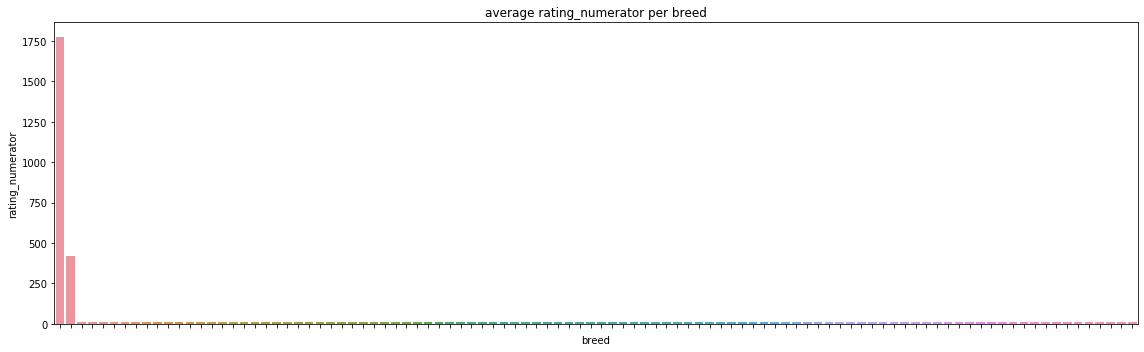

In [858]:
fig, ax = plt.subplots(figsize = (16,5))
ax = sns.barplot(x = "breed", y = "rating_numerator", data = df_breed_group_mean.sort_values("rating_numerator", ascending = False).iloc[:100])
ax.set_title("average rating_numerator per breed");
ax.xaxis.set_ticklabels([])
plt.tight_layout()

### 6. Popular dog stages pictures

In [859]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2070 entries, 0 to 2069
Data columns (total 19 columns):
tweet_id              2070 non-null int64
timestamp             2070 non-null object
source                2070 non-null object
text                  2070 non-null object
rating_numerator      2070 non-null float64
rating_denominator    2070 non-null float64
name                  1399 non-null object
retweet_count         2063 non-null float64
favorite_count        2063 non-null float64
followers             2063 non-null float64
display_text_range    2063 non-null object
jpg_url               1944 non-null object
p3_dog                1944 non-null object
rating                2070 non-null object
num                   2070 non-null float64
denom                 2070 non-null int64
stage                 2070 non-null object
breed                 1944 non-null object
conf                  1944 non-null float64
dtypes: float64(7), int64(2), object(10)
memory usage: 307.3+ KB


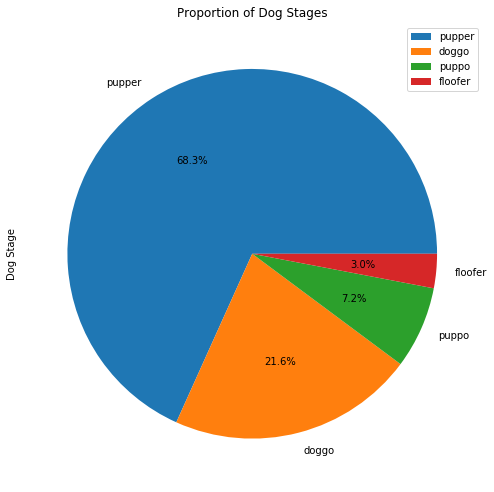

In [860]:
# Exclude the cases where the dog stage is missing.
df_stage = df[df['stage'] != "None"]
fig, ax = plt.subplots(figsize=(8.5,8.5))

df_stage['stage'].value_counts().plot(kind = 'pie', ax = ax, label = 'Dog Stage', autopct='%1.1f%%')
plt.title('Proportion of Dog Stages')
plt.legend();

* Excluding the missing values, the most often used stage is "pupper" with more than 65%, the second one is "doggo" (about 22%). The account owners use the words puppo and floofer in 10% of the cases alltogether.

### 7. Retweets and Likes per month

In [861]:
#transform the timestamp to datetime
df["timestamp"] = pd.to_datetime(df.timestamp)

C:\Users\dushy\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)
C:\Users\dushy\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)


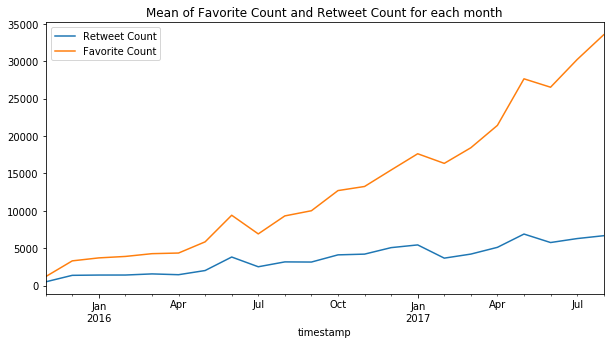

In [862]:
plt.subplots(figsize=(10,5))
df.groupby(df['timestamp'].dt.to_period("M")).mean()['retweet_count'].plot(label='Retweet Count')
df.groupby(df['timestamp'].dt.to_period("M")).mean()['favorite_count'].plot(label='Favorite Count')

plt.legend()
plt.title('Mean of Favorite Count and Retweet Count for each month');

### 8. Number of Tweets per month

C:\Users\dushy\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)


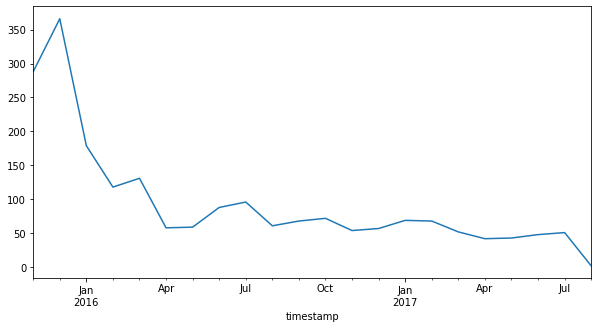

In [863]:
plt.subplots(figsize=(10,5))
df.groupby(df['timestamp'].dt.to_period("M")).count()['tweet_id'].plot()

* The plot above shows that WeRateDogs does not become more active in rating dogs as the month goes by. Actually, the tweet count has tendency to decrease